In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.externals import joblib

%matplotlib inline

In [2]:
# Load data
train_df = pd.read_csv("~/real_estate/data/v11/train_df.csv")
test_df = pd.read_csv("~/real_estate/data/v11/test_df.csv")
df = pd.concat([train_df,test_df])

county_df = pd.read_csv("~/real_estate/data/v9/zipcode.csv")
features = df.columns[:-2]

feature_df = df[features]
id_df = df[["target","postal_code"]]

# Scale
scaler = joblib.load("/home/gnazareths/real_estate/data/v11/scaler.pkl")
df = scaler.inverse_transform(feature_df)
df = pd.DataFrame(df, columns=features)
df["target"] = id_df["target"].values
df["postal_code"] = id_df["postal_code"].values

# Merge
df_ = pd.merge(df[["postal_code","year","month","target"]], county_df[["postal_code","county","state"]], on="postal_code", how="left")
df_["year"] = [int(i) for i in df_["year"].values]

In [16]:
returns_2011 = df_.loc[df_["year"] == 2011]["target"].values
returns_2012 = df_.loc[df_["year"] == 2012]["target"].values
returns_2013 = df_.loc[df_["year"] == 2013]["target"].values
returns_2014 = df_.loc[df_["year"] == 2014]["target"].values
returns_2015 = df_.loc[df_["year"] == 2015]["target"].values
returns_2016 = df_.loc[df_["year"] == 2016]["target"].values
returns_2017 = df_.loc[df_["year"] == 2017]["target"].values

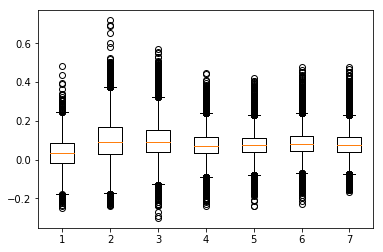

In [17]:
plt.boxplot([returns_2011, returns_2012, returns_2013, returns_2014, returns_2015, returns_2016, returns_2017])
plt.show()